Projeto final da disciplina de Processamento Digital de Signais II

Aluno: Rafael Gustavo Nagel

Professor: Fernando Pacheco

# Implementação de algoritmo para segmentar linhas de textos digitais em imagens

## Introdução

A extração de linhas, palavras e characteres textuais de imagens fazem parte da área de estudo denominada Reconhecimento Ótico de Caracteres (da sigla em inglês OCR). Cada vez mais existem aplicações que fazem uso dessa tecnologia, por exemplo, converter um livro que só existe em papel para o formato digital. 

A proposta deste trabalho é ilustrar uma possível implementação para a segmentação de documentos textuais em linhas, e promover uma discussão sobre o tópico.

Para a segmentação de linha, uma abordagem comum da ideia básica é descrita em [1], [2], [4], [5]. A base dessa segmentação consiste em aplicar uma binarização sobre a imagem contendo o texto, aplicar uma dilatação horizontal e então percorrer o vetor da imagem (pixeis) linha por linha e verificar se a linha está vázia ou contém pixeis que compõem o texto. Nessa abordagem, alguns limiares precisam ser estabelecidos e podem variar de implementação para implementação. Por exemplo: quantas linhas de pixeis vázias (sem nenhum elemento que compõe o texto) precisam ser encontradas para considerá-la como uma entrelinha? Além disso, é preciso levar em consideração as características da imagem do documento textual a ser analisada, por exemplo:

- O alinhamento das linhas textuais: por exemplo se o texto é escrito à mão é possível que seu alinhamento varie para cada linha escrita.

- Resolução da imagem: uma resolução maior geralmente significa que uma linha textual é composta por mais linhas de pixeis que uma imagem de baixa resolução.

- O ruído da imagem: pixeis que não compõem o texto nem o fundo da imagem podem estar localizados em qualquer lugar da imagem e eventualmente serem contabilizados como parte do texto.

- Contraste entre o texto e o fundo. Um contraste baixo entre esses outros componentes pode levar a uma binarização que não diferencie o texto do fundo.





## Implementação proposta

A implementação desse trabalho deve considerar documentos textuais alinhados, com ou sem ruídos, de qualquer resolução, inicialmente sem aplicar a dilatação horizontal. Dois limiares foram considerados, que podem ser ajustados conforme a imagem. Esses limiares são descritos a seguir.

### Limiar para identificação das linhas de pixeis que compõem o texto

Esse limiar é uma percentagem que define, para cada linha de pixeis da imagem, o valor mínimo da relação entre pixeis de textos contabilizados na linha e largura da imagem (total de pixeis em uma linha). Em outras palavras, é o percentagem de pixeis com cor diferente da cor do fundo, para cada linha de pixeis. Se essa relação for maior que esse limiar, então a linha de pixeis faz parte do texto, e não do fundo.

Limitações: um valor muito alto desse limiar faz com que apenas linhas extensas sejam contabilizadas. Já um valor muito baixo possibilita que ruídos sejam considerados como texto, ou que uma linha de texto seja vista como se fosse duas linhas. 

A seguir é mostrado um exemplo. Observe que as linhas segmentadas estão delimitadas entre duas linhas vermelhas horizontais cada.

Text(0.5, 1.0, 'limiar = 0.05')

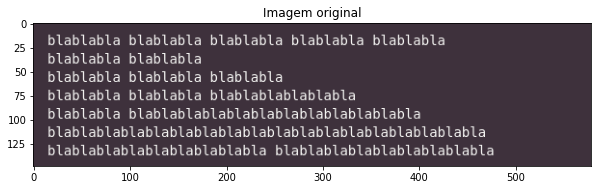

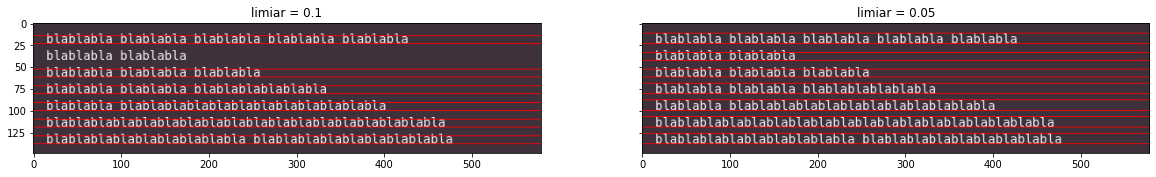

In [2]:
from TextImage import TextImage
import imshowpair
import matplotlib.pyplot as plt

img1 = TextImage("images/31.png", threshold_percent_px_cols=0.1)
img1.getTextLines()
img1.drawTextLines()

img2 = TextImage("images/31.png", threshold_percent_px_cols=0.05)
img2.getTextLines()
img2.drawTextLines()

plt.figure(figsize=(10,10))
plt.imshow(img1.image_original)
plt.title('Imagem original')

fig, axes = plt.subplots(1, 2, figsize=(20, 20), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img1.image_rgb)
ax[0].set_title(f"limiar = {img1.threshold_percent_px_cols}")

ax[1].imshow(img2.image_rgb)
ax[1].set_title(f"limiar = {img2.threshold_percent_px_cols}")

### Limiar para identificação de uma linha textual

Esse limiar define o número mínimo de linhas de pixeis (identificadas pelo limiar) consecutivas que compõem uma linha de texto do documento.

Limitações: um valor muito baixo para esse limiar em uma imagem com alta resolução, faz com que ruídos sejam identificados como linhas, ou segmentos de uma linha sejam considerados como uma linha completa. Um valor muito alto, em uma imagem com baixa resolução, faz com linhas textuais não sejam identificadas como tal, pois sua "altura" em pixeis não é grande o suficiente para ficar acima deste limiar.

A seguir exemplos para ilustrar esse limiar. Observe que os segmentos de textos identificados estão delimitados por linhas horizontais vermelhas.

Text(0.5, 1.0, 'Imagem de baixa resolução com limiar de altura (px)  = 10: 0 linhas contabilizadas.')

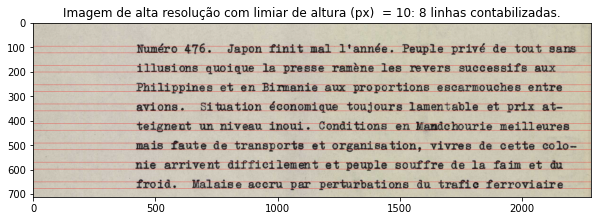

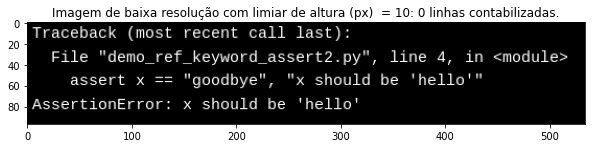

In [4]:
hr = TextImage("images/1.png", threshold_qty_px_rows_is_text=10)
hr.getTextLines()
hr.drawTextLines()

lr = TextImage("images/7.png", threshold_qty_px_rows_is_text=10)
lr.getTextLines()
lr.drawTextLines()

plt.figure(figsize=(10,10))
plt.imshow(hr.image_rgb)
plt.title(f"Imagem de alta resolução com limiar de altura (px)  = {hr.threshold_qty_px_rows_is_text}: {hr.getTextLines()} linhas contabilizadas.")

plt.figure(figsize=(10,10))
plt.imshow(lr.image_rgb)
plt.title(f"Imagem de baixa resolução com limiar de altura (px)  = {lr.threshold_qty_px_rows_is_text}: {lr.getTextLines()} linhas contabilizadas.")

## Fluxograma do algoritmo implementado
![Fluxograma do algoritmo implementado](flowchart.png)

### Código

A implementação foi feita em python no arquivo *TextImage.py* que contém a classe principal *TextImage* representando o documento de texto.

A seguir será mostrado alguns exemplos da segmentação de linhas.

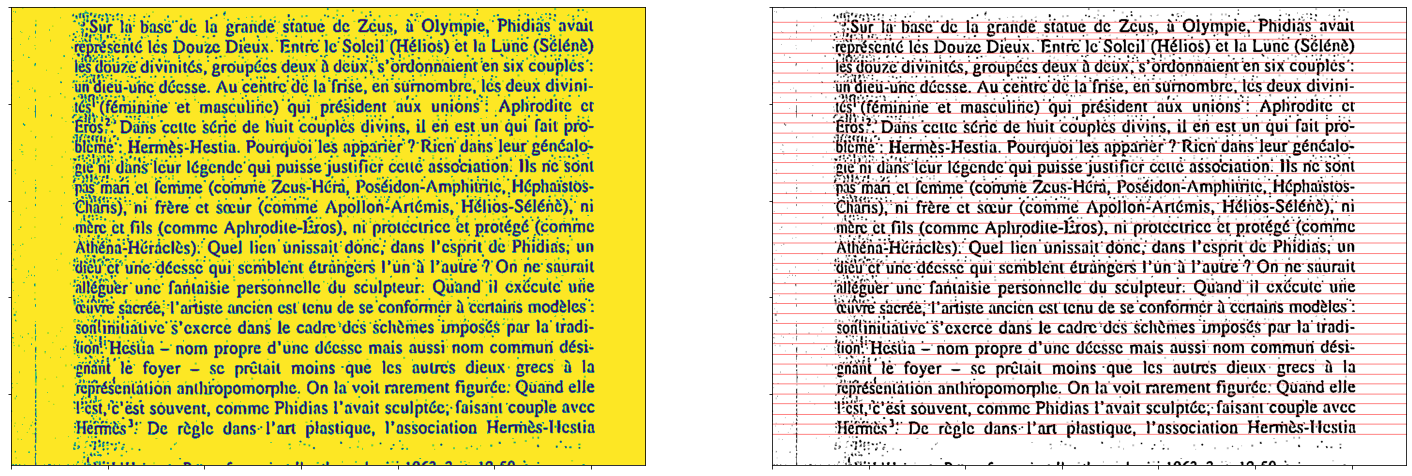

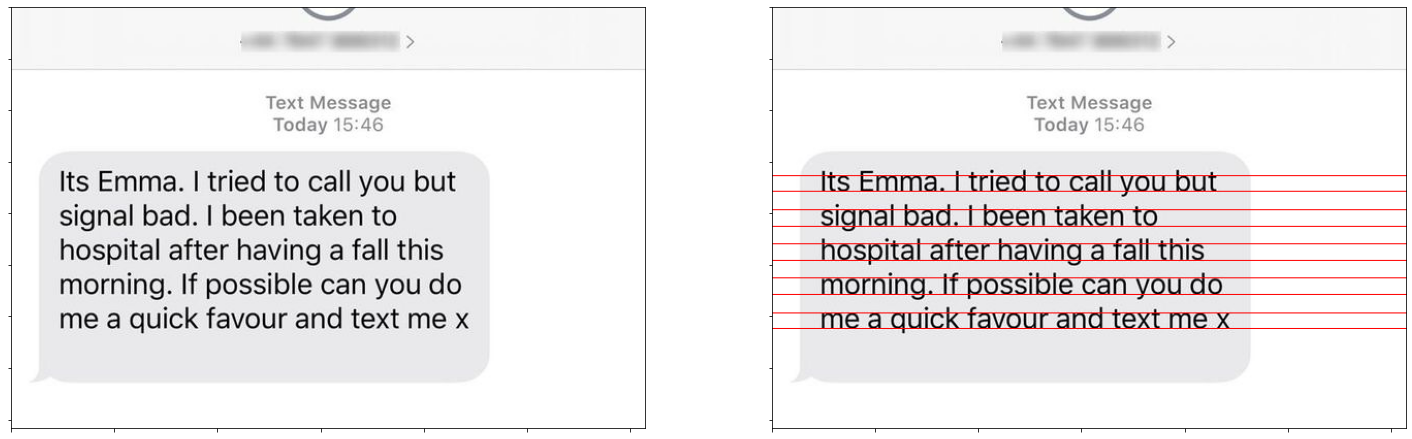

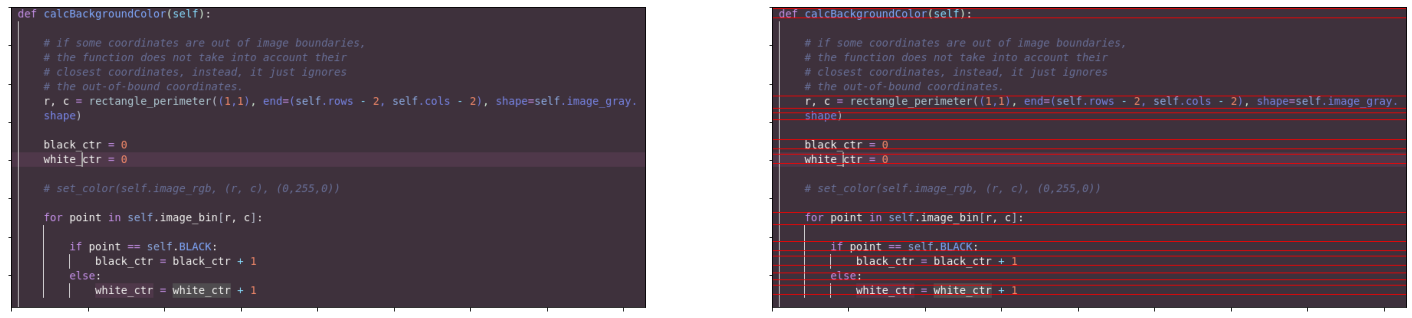

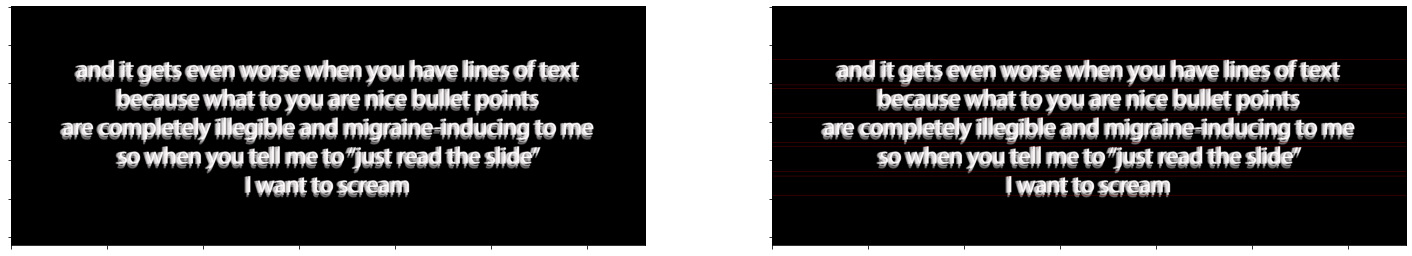

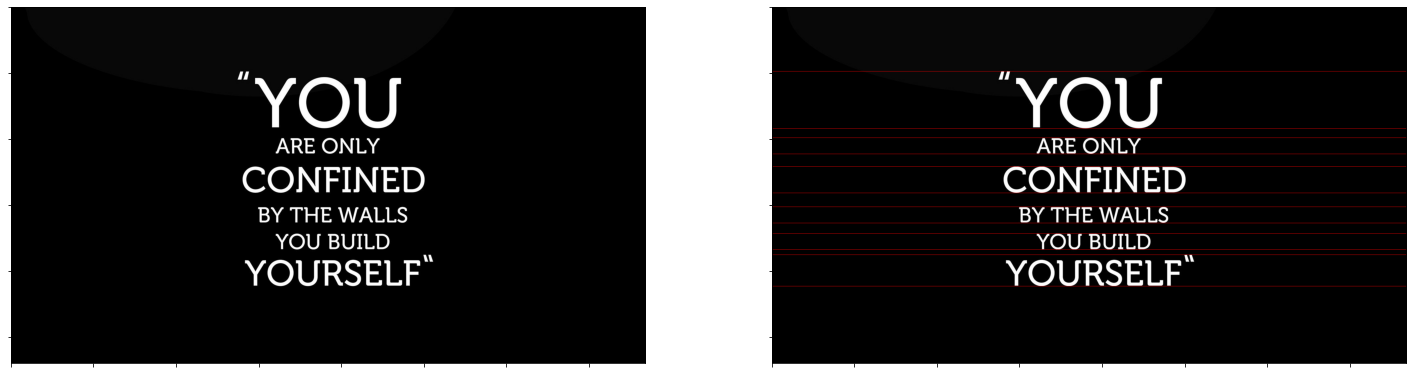

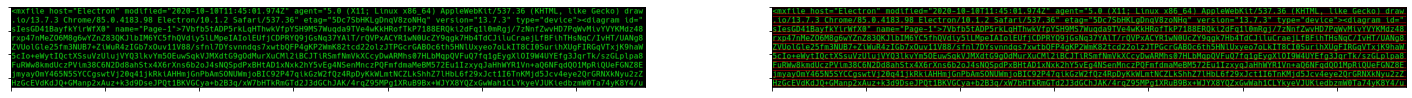

In [6]:
imgs = [
    {
        "file": "5.png",
        "th_percent": 0.1
    },
    {
        "file": "12.jpg",
        "th_percent": 0.1
    },
    {
        "file": "9.png",
        "th_percent": 0.005
    },
    {
        "file": "33.png",
        "th_percent": 0.001
    },
    {
        "file": "34.jpg",
        "th_percent": 0.001
    },
    {
        "file": "6.png",
        "th_percent": 0.05
    }
]



for i in imgs:

    img = TextImage(f"images/{i['file']}", 
                    threshold_img_bin=0.5, 
                    threshold_percent_px_cols=i['th_percent'], 
                    threshold_qty_px_rows_is_text=5)

    img.getTextLines()
    img.drawTextLines()
    img.saveImages()

    plt.figure(figsize=(25,25))
    imshowpair.imshowpair(img.image_original, img.image_rgb, size=(50,50))

## Adicionando dilatação horizontal

A aplicação da dilatação é ilustrada nos artigos [1], [4] e [5]. A dilatação consiste da aplicação de um *kernel* sobre os pixeis da imagem de maneira a aumentar as bordas dos pixeis brancos em um fundo de pixeis pretos. Caso a imagem a ser analisada tenha o texto preto em um fundo branco (após binarização), a classe *TextImage* fará a inversão dos pixeis para a aplicação da dilatação. O *kernel* escolhido é uma matriz composta de apenas uma linha e duas colunas ou mais, com isso dilatando apenas horizontalmente as linhas de pixeis. O número de colunas do *kernel* define o quanto as linhas serão dilatadas. Por padrão, usou-se um valor de 100 colunas, ou seja, uma matriz de $1 \times 100$ para o *kernel*.

Veja o exemplo a seguir.

Text(0.5, 1.0, 'Resultado sem dilação e redução do limiar: 13 linhas contabilizadas')

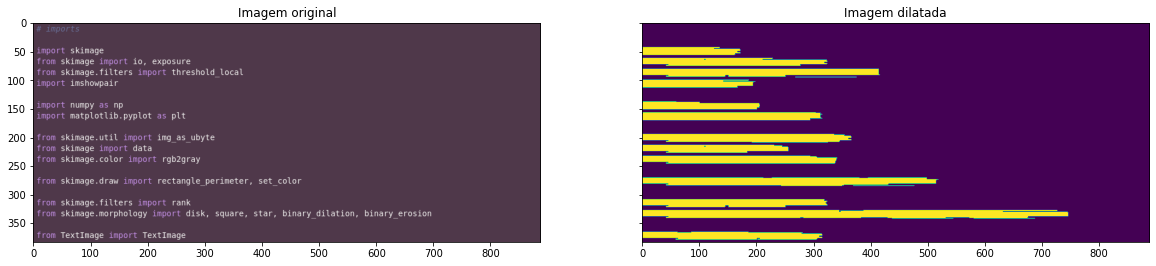

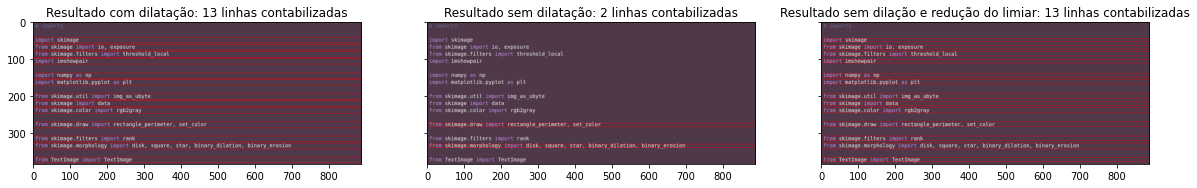

In [8]:
img_dilate = TextImage("images/13.png")
img_dilate.dilateLines()
img_dilate.getTextLines()
img_dilate.drawTextLines()

img = TextImage("images/13.png")
img.getTextLines()
img.drawTextLines()

img2 = TextImage("images/13.png", threshold_percent_px_cols=0.01)
img2.getTextLines()
img2.drawTextLines()


fig, axes = plt.subplots(1, 2, figsize=(20, 30), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img_dilate.image_original)
ax[0].set_title('Imagem original')

ax[1].imshow(img_dilate.image_bin_dilated)
ax[1].set_title('Imagem dilatada')

fig, axes = plt.subplots(1, 3, figsize=(20, 30), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img_dilate.image_rgb)
ax[0].set_title(f"Resultado com dilatação: {img_dilate.getTextLines()} linhas contabilizadas")

ax[1].imshow(img.image_rgb)
ax[1].set_title(f"Resultado sem dilatação: {img.getTextLines()} linhas contabilizadas")

ax[2].imshow(img2.image_rgb)
ax[2].set_title(f"Resultado sem dilação e redução do limiar: {img2.getTextLines()} linhas contabilizadas")

Como visto no exemplo acima, a dilatação é apenas uma alternativa a redução do limiar de percentagem das linhas de pixeis. Ambos trazem o mesmo resultado se o limiar for diminuído para um valor pequeno suficiente. A dilatação também não resolve o problema de ruídos nas imagens, pelo contrário, tende a piorar, pois dilata o ruído também, facilitando a identificação do ruído como se fosse uma linha de texto. 

Veja um exemplo onde a dilatação tem resultados piores do que a modificação do limiar de percentagem:

Text(0.5, 1.0, 'Resultado sem dilatação: 10 linhas contabilizadas')

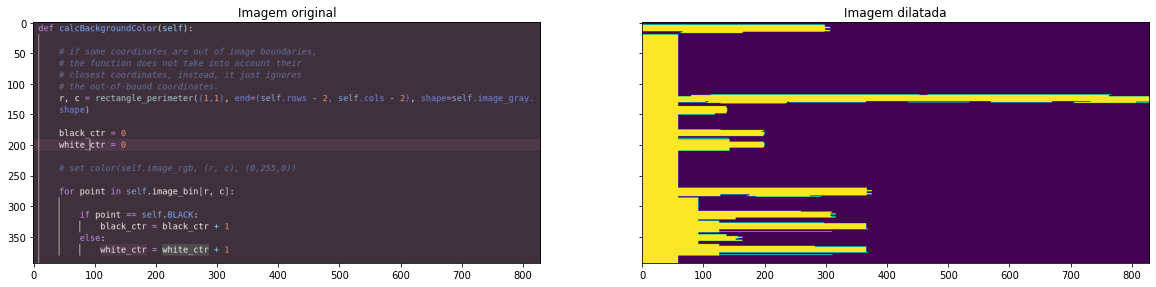

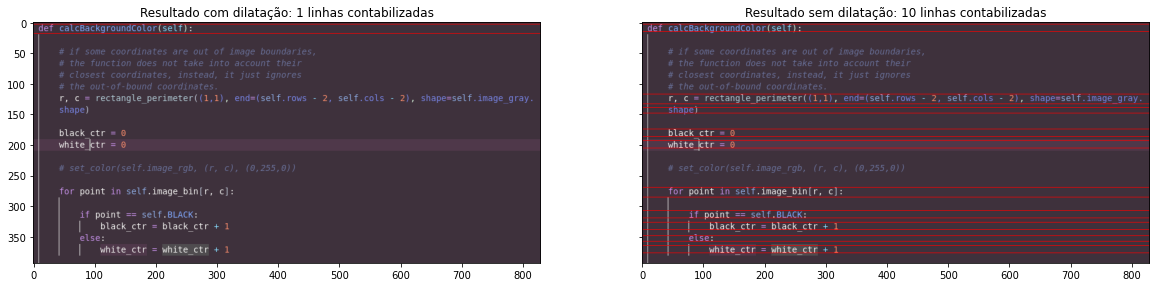

In [10]:
img_dilate = TextImage("images/9.png", threshold_percent_px_cols=0.005)
img_dilate.dilateLines()
img_dilate.getTextLines()
img_dilate.drawTextLines()

img = TextImage("images/9.png", threshold_percent_px_cols=0.005)
img.getTextLines()
img.drawTextLines()

fig, axes = plt.subplots(1, 2, figsize=(20, 30), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img_dilate.image_original)
ax[0].set_title('Imagem original')

ax[1].imshow(img_dilate.image_bin_dilated)
ax[1].set_title('Imagem dilatada')

fig, axes = plt.subplots(1, 2, figsize=(20, 30), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img_dilate.image_rgb)
ax[0].set_title(f"Resultado com dilatação: {img_dilate.getTextLines()} linhas contabilizadas")

ax[1].imshow(img.image_rgb)
ax[1].set_title(f"Resultado sem dilatação: {img.getTextLines()} linhas contabilizadas")

A linha vertical branca à esquerda da imagem é dilatada também, o que inibe a identificação das linhas pelo algoritmo.

## Contabilizando número de palavras em cada linha de texto

Após deliminar as linhas de texto, usou-se uma abordagem similar com o descrito em [5] para segmentar as palavras de cada linha. A segmentação de palavras baseia-se no espaçamento existente entre as palavras. O primeiro passo nesta etapa é aplicar uma dilatação horizontal nas linhas com um *kernel* de $1 \times N$. O valor de $N$ não pode ser muito grande ao ponto do espaçamento entre as palavras deixar de existir. Usou-se um $N = 10$ como padrão para a demonstração neste trabalho. Após a dilatação, usou-se um algoritmo similar ao aplicado na segmentação de linhas, porém aplicado apenas na região delimitada composta pela linha e com limiares pequenos. Percorreu-se essa região iterando ao longo das colunas, verificando-se as colunas de pixeis "vázias" como separação de palavras. Esse processo está implementado na função *getWords* da classe *TextLineImage*.

Observe que esse valor de dilatação ($N = 10$) não funciona para todas as imagens, pois o espaçamento entre palavras pode ser maior ou menor. Além disso, se o espaçamento entre characteres for muito próximo do espaçamento entre palavras, um ajuste fino no valor de $N$ deve ser realizado para o algoritmo não confundir letras com palavras. Ainda assim, esse ajuste fino não garante precisão em todos os casos, pois há imagens que o espaçamento entre caracteres pode ser igual ou maior que o espaçamento entre palavras.

A seguir alguns exemplos.

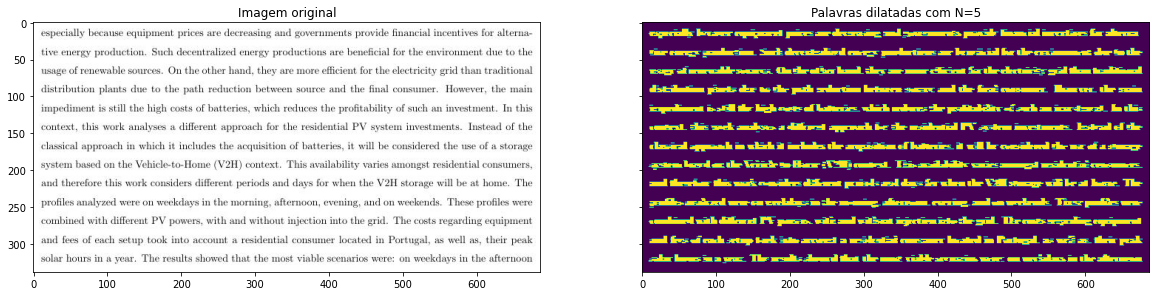

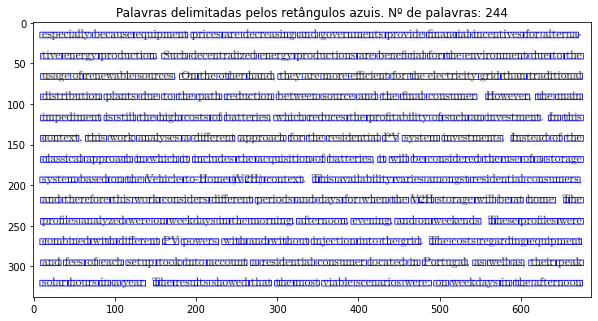

In [12]:

imgs = [
    {
        "file": "0.jpg",
        "dilation": 5,
        "th_percent": 0.1,
        "color": (0,0,255)
    },
    # {
    #     "file": "2.jpg",
    #     "dilation": 10,
    #     "th_percent": 0.05,
    #     "color": (0,0,255)
    # },
    # {
    #     "file": "1.png",
    #     "dilation": 14,
    #     "th_percent": 0.10,
    #     "color": (0,0,255)
    # },
    # {
    #     "file": "33.png",
    #     "dilation": 6,
    #     "th_percent": 0.05,
    #     "color": (255,255,0)
    # },
    # {
    #     "file": "5.png",
    #     "dilation": 6,
    #     "th_percent": 0.1,
    #     "color": (0,0,255)
    # }
]

img = 0

for i in imgs:

    img = TextImage(f"images/{i['file']}", threshold_percent_px_cols=i['th_percent'])
    img.getTextLines()

    N = i['dilation']
    img.dilateWords(N)
    words = img.getWordsPerLine()
    # img22.drawTextLines()
    img.drawWords(i['color'])
    img.saveImages()

    fig, axes = plt.subplots(1, 2, figsize=(20, 30), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(img.image_original)
    ax[0].set_title("Imagem original")

    ax[1].imshow(img.image_bin_dilated_words)
    ax[1].set_title(f"Palavras dilatadas com N={N}")

    plt.figure(figsize=(10,10))
    plt.imshow(img.image_rgb)
    plt.title(f"Palavras delimitadas pelos retângulos azuis. Nº de palavras: {sum(words)}")

É possível aplicar o mesmo processo, porém sem dilatação ou com dilatação muito pequena, para identificar os characteres nas linhas. Essa abordagem funciona bem para imagens sem ruídos. A seguir um exemplo da diferença entre extrair palavras e extrair characteres. Apenas a dilatação é removida do primeiro para o segundo.

Text(0.5, 1.0, 'Extração de characteres sem dilatação (mesmo procedimento)')

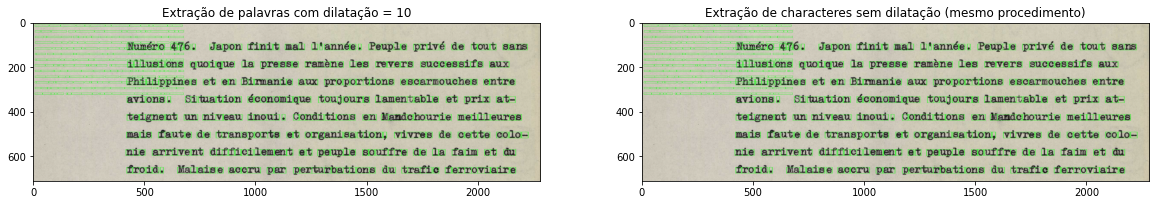

In [15]:
img_words = TextImage('images/1.png', threshold_percent_px_cols=0.1)
img_words.getTextLines()
img_words.dilateWords(5)
img_words.getWordsPerLine()
img_words.drawWords()

img_chars = TextImage('images/1.png', threshold_percent_px_cols=0.1)
img_chars.getTextLines()
# sem dilatação
img_chars.getWordsPerLine()
img_chars.drawWords()

img_chars.saveImages()

fig, axes = plt.subplots(1, 2, figsize=(20, 30), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img_words.image_rgb)
ax[0].set_title("Extração de palavras com dilatação = 10")

ax[1].imshow(img_chars.image_rgb)
ax[1].set_title("Extração de characteres sem dilatação (mesmo procedimento)")

## Conclusões

O processo apresentado neste documento para segmentação de linha de textos em imagens de documentos digitais mostrou-se trivial, gerando resultados satisfatórios para documentos sem ruídos e de diferentes resoluções, e ainda sem necessitar da aplicação de filtros na imagem. Dois limiares podem ser ajustados para uma segmentação mais precisa.

Com as regiões das linhas delimitadas, é possível então segmentar as palavras contidas em cada linha, com um algoritmo similar ao aplicado na segmentação de linhas, porém com limiares reduzidos. O mesmo método pode ser aplicado para extrair os characteres de cada linha, bastando apenas reduzir ou remover a dilatação. Observe que essa proposta funciona bem para imagens sem ruídos. Caso haja ruídos, eles serão identificados como characteres.

A aplicação de filtros para remoção dos ruídos antes da execução do algoritmo não se mostrou eficiente, pois o filtro também deteoriza os characteres, prejudicando sua extração.

Algumas melhorias são possíveis para o trabalho: predefinir valores para os limiares baseado na resolução da imagem; comparar o algoritmo implementado com outras abordagens de segmentação, como por exemplo a apresentada em [4] para segmentas as linhas.


## Referências

[1] Extraction of Line Word Character Segments Directly from Run Length Compressed Printed Text Documents. Url: https://arxiv.org/pdf/1403.7783.pdf

[2] Text-Based Image Segmentation Methodology. Url: https://reader.elsevier.com/reader/sd/pii/S2212017314000954?token=274F1643C61EFED32374AC5F2CABDA446ECD53BDD9152559E98C7B8581D8F0A9CC7E666805ED2CEFFD5C644D5C0025CF

[3] Text line detection in handwritten documents. Url: https://users.iit.demokritos.gr/~bgat/Louloud2008.pdf

[4] Line and Word Segmentation Approach for Printed Documents. Url: https://www.researchgate.net/publication/45718409_Line_and_Word_Segmentation_Approach_for_Printed_Documents/link/53d9f54f0cf2631430c7e676/download

[5] An Introduction to Morphological Operations for Digital Image Text Classification. Url: https://medium.com/hackernoon/an-introduction-to-morphological-operations-for-digital-image-text-classification-79cb14bab2d7
